# Distribution Functions

After this session you will 
- develop a basic intuition underlying selected distributions 
- develop an understanding for selected concepts of (inferential) statistics
- be able to apply an important numpy method (useful also in later weeks of the bootcamp)

In [1]:
import pandas as pd
import numpy as np


from collections import Counter

import matplotlib.pyplot as plt
plt.figure(figsize=(11,5))

import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

<Figure size 792x360 with 0 Axes>

### Uniform Distribution

In [3]:
def toss_dice(no_dice = 1, obs = 1, faces = 6):
    return np.random.randint(
        low = 1,
        high= faces+1,
        size= no_dice*obs
    ).reshape(-1, obs) #### -1 place holder

In [4]:
data = toss_dice(obs=1000_000)
data.shape   

(1, 1000000)

In [5]:
data = data.reshape(-1,)

In [6]:
data.shape 

(1000000,)

In [7]:
counter=Counter(data)

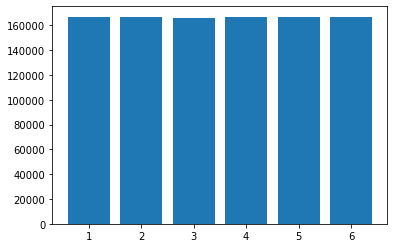

In [8]:
plt.bar(counter.keys(), counter.values());

In [22]:
N_DICE = 100
OBS = 100000

In [23]:
def plotDice(no_dice= N_DICE, obs=OBS):
    data = toss_dice(no_dice, obs)
    s = data.sum(axis=1) 
    return pd.Series(s).hist(bins=15) # note: this brings array into a series

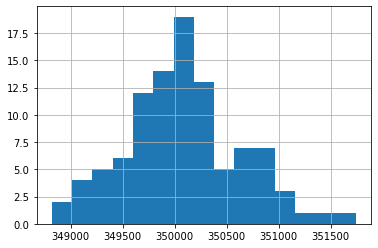

In [24]:
plotDice();

**with more dice rolls, the uniform distribution becomes close to a normal distribution**

### Bernoulli Distribution

There are two possible outcomes: Coin toss, pass/fail, etc.

Success probability is p, failure probability (1-p).

If it's a fair coin, that means 0.5 probability of being heads and 1-0.5 probability of being tails.

In [28]:
def toss_coins(no_coins=1, obs=1, thresh=0.5):
    coins = np.random.random(size=no_coins*obs)
    b = coins > thresh  # <-- probability threshold
    return b.astype(int).reshape(-1, no_coins)

In [44]:
N_COINS = 100
OBS = 100_000

In [45]:
def plotCoins(no_coins= N_COINS, obs=OBS):
    data=toss_coins(no_coins, obs)
    s = data.sum(axis=1)
    return pd.Series(s).hist(bins=12)

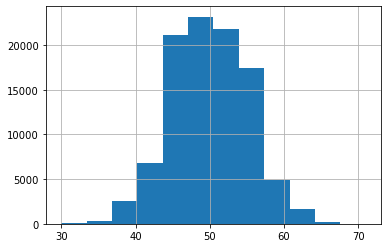

In [46]:
plotCoins();

**with more coin rolls, the Bernouilli distribution becomes close to a normal distribution**

### Central Limit Theorem

The **Central limit theorem** states that if you add up many distributions, you always end up with a normal distribution.

In the example above, we saw that as the number of trials increased in a Binomial trial, we got closer to the expected value (mean of 0.5).

Now let's go to the next step: Creating many Binomial distributions each of which have several success/failures.

We do the above experiment 10000 times with n_trials in each set.


**The CLT is the reason why we see the normal distribution everywhere**

### Binomial Distribution

Sum of independent and identically distributed **(iid)** random variables.

$f(k,n,p)= {\binom {n}{k}}p^{k}(1-p)^{n-k}$

* p - probability of a binary event (probability for heads)
* n - number of events (coin tosses)
* k - number of successes (number of heads <= n)

If you had two coin tosses, for three heads your probability would be 

$p^3 = 0.5^3 = 0.125$


A nice long explanation here: 
    https://math.stackexchange.com/questions/838107/what-is-the-difference-and-relationship-between-the-binomial-and-bernoulli-distr
    

In [47]:
# we toss 3 coins, count the number of 'heads', repeat 10 times
np.random.binomial(n=3, p=0.5, size=10)  # results are the 'k' values

array([3, 0, 2, 1, 2, 1, 1, 0, 1, 3])

In [48]:
# if we want to know the probability for 2 heads with 3 coins
# use the formula:
from math import factorial

p = 0.5
n = 3
k = 2

binom = factorial(n) / (factorial(k) * factorial(n-k))

binom * p**k * (1-p)**(n-k)

0.375

### Normal (Gaussian) Distribution

$f(x)={\frac {1}{\sigma {\sqrt {2\pi }}}}e^{-{\frac {1}{2}}\left({\frac {x-\mu }{\sigma }}\right)^{2}}$

A lot of things in the real world come from an underlying normal distribution.

Example: You are measuring the mean height of a population. The more measurements you have, the more your measurements are likely to follow the Gaussian curve, around the mean of your population height.

<AxesSubplot:>

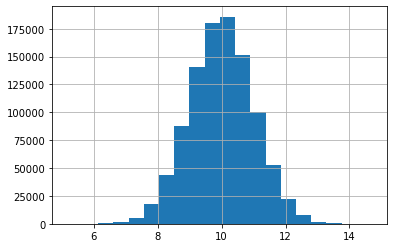

In [49]:
data = np.random.normal(10.0, 1.0, 1000_000)
pd.Series(data).hist(bins=20)

In [50]:
nor_mean = 10
nor_std = 3
nor_std2 = 2
nor_std3 = 5

np.random.seed(42)
var_normal = np.random.normal(nor_mean, nor_std, 1000)
var_normal2 = np.random.normal(nor_mean, nor_std2, 1000)
var_normal3 = np.random.normal(nor_mean, nor_std3, 1000)

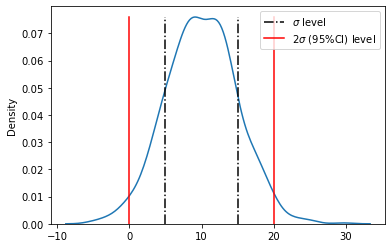

In [53]:
sns.distplot(var_normal3, hist = False, kde = True)
y = np.arange(100)/1300
x = np.zeros(100) + 10
plt.plot(x + nor_std3 ,y,'-.k',label = '$\sigma$ level')
plt.plot(x - nor_std3 ,y,'-.k')
plt.plot(x + 2* nor_std3 ,y,'r',label = '$2 \sigma$ (95%CI) level')
plt.plot(x - 2 * nor_std3 ,y,'r')
plt.legend()

# Other Concepts of Inferential Statistics

#### Confidence Intervals

$$ CI = \bar{x} \pm z \frac{\sigma}{\sqrt{n}}$$


In the above equation the $\sigma$ is the standard deviation, z is the confidence level and n is the sample size.

68.2 - 95 - 99.97 % confidence intervals correspond to 1-2-3 $\sigma$ levels.

For eg. if you report your mean with  "3sigma", this is a confidence level of 99.97%, the percentage of times, this will be your sample mean, or the likelihood that the true value of your population parameter is this. 

In the encounter on "Statistics of Time Series", we will talk about CI in the context of the so-called ADF-test...

### Law of Large Numbers

The **Law of large numbers** states that the sample mean approaches the population mean for a large N

With larger number of experiments, the mean result gets closer to the expected p. E.g. with many coin tosses (so multiple Bernouilli processes adding up as binomial).

Also, if we increase N for the normal distribution (or the uniform) the samples became representative of the underlying distribution.